# 1. Загрузка данных и импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

С помощью google drive импортируем данные

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
project_path = "/content/drive/MyDrive/Medical-Cost-Personal/insurance.csv"
df = pd.read_csv(project_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 2. Подготовка датасета

age: возраст основного выгодоприобретателя

sex: пол страхового агента, женщина, мужчина

bmi: индекс массы тела, обеспечивающий понимание тела, веса, который является относительно высоким или низким по отношению к росту, объективный показатель массы тела (кг/м^2), использующий отношение роста к весу, в идеале от 18,5 до 24,9

children: Количество детей, охваченных медицинским страхованием / Количество иждивенцев

smoker: Курение

region: район проживания бенефициара в США, северо-восток, юго-восток, юго-запад, северо-запад.

charges: Индивидуальные медицинские расходы, выставленные медицинским страхованием.



In [3]:
df.shape

(1338, 7)

Проверим данные на дупликаты

In [4]:
df.drop_duplicates(inplace=True)

После проверки мы видим что одна пара данных была одинаковой

In [5]:
df.shape

(1337, 7)

У нас нет пропусков, 4 некатегориальных признака, 3 категориальных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


В 2020 году средние расходы на здравоохранение в расчёте на одного человека в США составили $11 012

In [8]:
X = df[['age','children','bmi']]
y = df[['charges']]

y_class = (y > 11012).astype(int)

In [9]:
y_class.value_counts()

,count
charges,
0,771
1,566


# 3. Модели с базовыми параметрами

## Наивный Баес

Разделяем датасет на обучающую и тестовую выборки

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=52)

In [11]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


По CM можно увидеть, что зачастую прогнозы происходять верно

In [12]:
confusion_matrix(y_test, y_pred_gnb)

array([[108,  36],
       [ 50,  74]])

Пока что точность модели не очень хорошая

In [13]:
accuracy_score(y_test, y_pred_gnb)

0.6791044776119403

Также и с f1, она даже хуже чем точность

In [14]:
f1_score(y_test, y_pred_gnb)

0.6324786324786325

## KNN

In [15]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [16]:
confusion_matrix(y_test, y_pred_knn)

array([[126,  18],
       [ 59,  65]])

In [17]:
accuracy_score(y_test, y_pred_knn)

0.7126865671641791

In [18]:
f1_score(y_test, y_pred_knn)

0.6280193236714976

При нашей выборке KNN работает чуть хуже чем Наивный Баес

## Логистическая регрессия

In [19]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
confusion_matrix(y_test, y_pred_lr)

array([[99, 45],
       [46, 78]])

In [21]:
accuracy_score(y_test, y_pred_lr)

0.6604477611940298

In [22]:
f1_score(y_test, y_pred_lr)

0.6315789473684211

## В итоге, при базовых параметрах лучшую точность показал KNN, а лучший f1_score - показал Наивный Баес

# 4. Модели с гиперпараметрами

## Подбор гиперпараметров

Для числовых признаков произвели нормировку

С помощью gridsearchCV подобрали лучшие параметры к моделям

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=52)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gnb = GaussianNB()
knn_model = KNeighborsClassifier()
lr = LogisticRegression()

params_knn = {'n_neighbors' : np.arange(1, 31),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

params_lr={'C' : np.logspace(-3,3,7),
           'penalty' : ['l1', 'l2'],
           'solver' : ['lbfgs', 'liblinear']}

params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}


gs_knn = GridSearchCV(knn_model, params_knn, scoring='f1', cv=3, n_jobs=-1, verbose=3)
gs_gnb = GridSearchCV(gnb, params_NB, scoring='f1', cv=3, n_jobs=-1, verbose=3)
gs_lr = GridSearchCV(lr, params_lr, scoring='f1', cv=3, n_jobs=-1, verbose=3)

## Наивный байес

In [24]:
gs_gnb.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=3)

In [25]:
gs_gnb.best_params_

{'var_smoothing': 0.03511191734215131}

In [26]:
gnb_best = GaussianNB(var_smoothing=0.03511191734215131)

gnb_best.fit(X_train_scaled, y_train)

y_pred_gnb_best = gnb_best.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
confusion_matrix(y_test, y_pred_gnb_best)

array([[108,  36],
       [ 50,  74]])

In [28]:
accuracy_score(y_test, y_pred_gnb_best)

0.6791044776119403

In [29]:
f1_score(y_test, y_pred_gnb_best)

0.6324786324786325

После подбора гиперпараметров ни точность, ни f1 score не изменились

## KNN

In [30]:
gs_knn.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [31]:
gs_knn.best_params_

{'n_neighbors': 28, 'p': 1, 'weights': 'uniform'}

In [32]:
knn_model_best = KNeighborsClassifier(n_neighbors=28, p=1, weights='uniform')

knn_model_best.fit(X_train_scaled, y_train)

y_pred_knn_best = knn_model_best.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [33]:
confusion_matrix(y_test, y_pred_knn_best)

array([[135,   9],
       [ 60,  64]])

In [34]:
accuracy_score(y_test, y_pred_knn_best)

0.7425373134328358

In [35]:
f1_score(y_test, y_pred_knn_best)

0.649746192893401

После подбора гиперпараметров у нас немного повысились обе метрики

## Логистическая регрессия

In [36]:
gs_lr.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
21 fits failed out of a total of 84.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1', verbose=3)

In [37]:
gs_lr.best_params_

{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [38]:
lr_best = LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

lr_best.fit(X_train_scaled, y_train)

y_pred_lr_best = lr_best.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
confusion_matrix(y_test, y_pred_lr_best)

array([[99, 45],
       [46, 78]])

In [40]:
accuracy_score(y_test, y_pred_lr_best)

0.6604477611940298

In [41]:
f1_score(y_test, y_pred_lr_best)

0.6315789473684211

## После подбора гиперпараметров наилучшей оказалась модел KNN

# 5. Полная модель с категориальными признаками и гиперпараметрами

In [42]:
X = df.drop('charges',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=52)

In [43]:
categorical = ['sex', 'smoker', 'region']
numeric_features = ['age','bmi','children']

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

pipe = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsClassifier())
    ])


params = {'model__n_neighbors' : np.arange(1, 31),
          'model__weights' : ['uniform', 'distance'],
          'model__p' : [1, 2]}

gs = GridSearchCV(pipe, params, scoring='f1', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region']),
                                                                        ('scaling',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children'])])),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance']},
             scoring='f1', verbose=2)

In [44]:
gs.best_params_

{'model__n_neighbors': 7, 'model__p': 1, 'model__weights': 'distance'}

In [45]:
pipe_best = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsClassifier(n_neighbors=7, p=1, weights='distance'))
    ])
pipe_best.fit(X_train, y_train)

pred_pipe = pipe_best.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [46]:
accuracy_score(y_test, pred_pipe)

0.8880597014925373

In [47]:
f1_score(y_test, pred_pipe)

0.8695652173913043

## После построения полной модели метрики сильно улучшились, что говорит о качестве модели

# 6. Explainer Dashboard

In [48]:
!pip install explainerdashboard -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.7 MB/s eta 0:00:00


In [49]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [50]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [51]:
explainer = ClassifierExplainer(gs.best_estimator_, X_test, y_test)

splitting pipeline...
Detected sklearn/imblearn Pipeline and succesfully extracted final output dataframe with column names and final model...
Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [52]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



  0%|          | 0/268 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarni

Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [53]:
db.run()

Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)


<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>

По дешборду можно видеть что наиболее важные признаки это возраст и курение

## Метрики

В среднем метрики получились неплохие, все выше 0.8, что говорит о хорошем качестве построенной модели

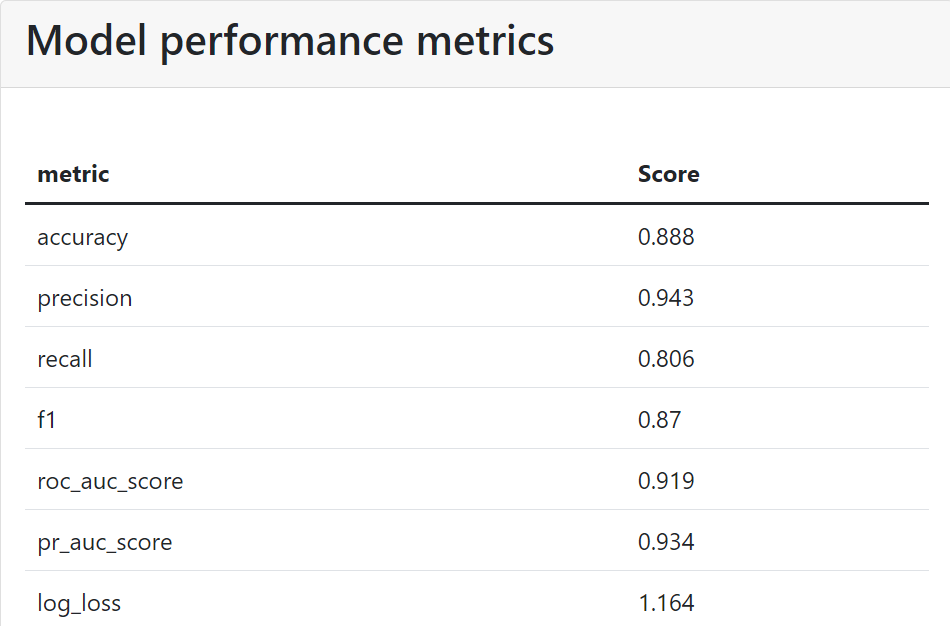

## Индивидуальные прогнозы

### index 77

По нашим данным можно утверждать что 77 индекс на 100% будет принадлежать к классу 0

Average of population	46.0%

scaling__age = 0.06521739130434784	-20.73%

ohe__smoker_no = 1.0	-10.33%

ohe__smoker_yes = 0.0	-10.33%

scaling__bmi = 0.5264998654829163	-4.71%

scaling__children = 0.0	+1.38%

ohe__sex_male = 1.0	-0.71%

ohe__sex_female = 0.0	-0.71%

ohe__region_northwest = 0.0	+0.36%

ohe__region_southeast = 1.0	-0.34%

ohe__region_southwest = 0.0	+0.07%

ohe__region_northeast = 0.0	+0.04%

Other features combined	+0.0%

Final prediction	-0.0%

### index 1136

По нашим данным можно утверждать, что 76.8% на то что объект принадлежит к классу 0, а 23.2% на то что принадлежит к классу 1


Average of population	46.0%

scaling__age = 0.5652173913043479	-12.85%

ohe__smoker_no = 1.0	-9.99%

ohe__smoker_yes = 0.0	-9.99%

scaling__bmi = 0.24320688727468387	+5.31%

ohe__sex_female = 1.0	+2.49%

ohe__sex_male = 0.0	+2.49%

scaling__children = 0.2	+1.97%

ohe__region_southwest = 1.0	-1.94%

ohe__region_northwest = 0.0	-0.58%

ohe__region_southeast = 0.0	+0.4%

ohe__region_northeast = 0.0	-0.16%

Other features combined	+0.0%

Final prediction	23.15%

### index 747

По нашим данным можно утверждать что 747 индекс на 100% будет принадлежать к классу 0

Average of population	46.0%

scaling__age = 0.02173913043478265	-20.13%

ohe__smoker_no = 1.0	-10.94%

ohe__smoker_yes = 0.0	-10.94%

scaling__children = 0.0	-1.46%

ohe__sex_male = 1.0	-0.97%

ohe__sex_female = 0.0	-0.97%

scaling__bmi = 0.15590529997309654	-0.89%

ohe__region_southwest = 0.0	+0.46%

ohe__region_northwest = 1.0	-0.4%

ohe__region_southeast = 0.0	+0.14%

ohe__region_northeast = 0.0	+0.1%

Other features combined	+0.0%

Final prediction	0.0%